In [1]:
#pip install git+https://github.com/huggingface/diffusers.git transformers accelerate

In [2]:
import numpy as np
import torch
from PIL import Image
from diffusers.utils import make_image_grid

In [3]:
from models.unclip_merge import UnclipMergePipeline

model_id = "stabilityai/stable-diffusion-2-1-unclip"

In [3]:
pipe = UnclipMergePipeline.from_pretrained(model_id,
                                         torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()
pipe.enable_xformers_memory_efficient_attention()

image_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


In [4]:
from diffusers import UNet2DConditionModel

unet = UNet2DConditionModel.from_pretrained(
        model_id, subfolder="unet",
        in_channels=9,
        low_cpu_mem_usage=False,
        ignore_mismatched_sizes=True,
    )

Some weights of UNet2DConditionModel were not initialized from the model checkpoint at stabilityai/stable-diffusion-2-1-unclip and are newly initialized because the shapes did not match:
- conv_in.weight: found shape torch.Size([320, 4, 3, 3]) in the checkpoint and torch.Size([320, 9, 3, 3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


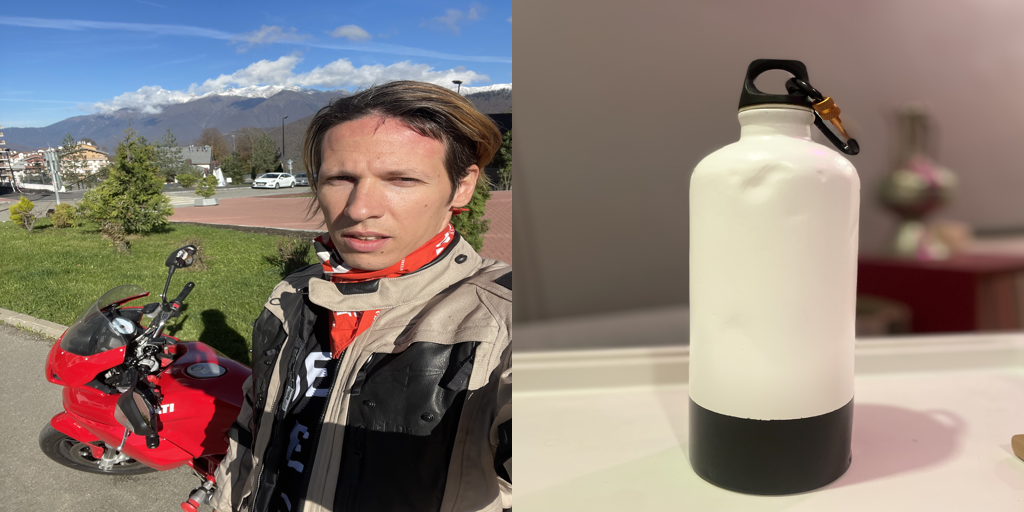

In [4]:
source_image = Image.open('./cache/in/IMG_6750.jpeg').resize((512, 512))
target_image = Image.open('./cache/in/IMG_4965.jpeg').resize((512, 512))
make_image_grid([source_image, target_image], 1, 2)

In [5]:
# pipe.load_textual_inversion('sd-concepts-library/clothes')

In [6]:
mask = pipe.generate_mask(source_image,
                          target_prompt='clothes',
                          source_prompt='',
                          output_type='pil')

AttributeError: 'numpy.ndarray' object has no attribute 'unsqueeze'

In [ ]:
mask

In [ ]:
pipe(source_image, 'put on <cat-toy>', noise_level=50, num_inference_steps=50).images[0]